# Flux Vision Data

In [111]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify


%matplotlib inline

In [2]:
# reading the csv file
df = pd.read_csv('data/Zoning Province/Flux_24h.csv',sep = ';')
df

Date    Origin  Destination Immobility  \
0       2020-01-31  Bas-Uele       Tshopo         1h   
1       2020-01-31  Bas-Uele       Tshopo         3h   
2       2020-01-31  Equateur     Kinshasa         1h   
3       2020-01-31  Equateur     Kinshasa         3h   
4       2020-01-31  Equateur  Nord-Ubangi         1h   
...            ...       ...          ...        ...   
142771  2020-06-29    Tshopo      Maniema         3h   
142772  2020-06-29    Tshopo      Mongala         1h   
142773  2020-06-29    Tshopo      Mongala         1h   
142774  2020-06-29    Tshopo     Sud-Kivu         1h   
142775  2020-06-29   Tshuapa       Tshopo         1h   

                    Home_Category        Activity_Category Observation_Zone  \
0       Destination_Zone_Resident  Destination_Zone_Worker      ZoneGlobale   
1       Destination_Zone_Resident  Destination_Zone_Worker      ZoneGlobale   
2                Outside_Resident           Outside_Worker      ZoneGlobale   
3            Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
4                Outside_Resident           Outside_Worker      ZoneGlobale   
...                           ...                      ...              ...   
142771       Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
142772           Outside_Resident           Outside_Worker      ZoneGlobale   
142773       Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
142774           Outside_Resident           Outside_Worker      ZoneGlobale   
142775           Outside_Resident           Outside_Worker      ZoneGlobale   

             Mode  Volume  
0       All_modes     124  
1       All_modes     124  
2       All_modes     577  
3       All_modes     290  
4       All_modes     288  
...           ...     ...  
142771  All_modes     101  
142772  All_modes     118  
142773  All_modes    1097  
142774  All_modes     101  
142775  All_modes     691  

[142776 rows x 9 columns]

In [3]:
list((df.groupby(by = 'Home_Category').groups.keys()))

['Destination_Zone_Resident',
 'Origin_Zone_Resident',
 'Outside_Resident',
 'Study_Zone_Resident']

In [4]:
#consider only 'Date','Origin' and 'Destination'
df = df.groupby(by=['Date','Origin','Destination'], as_index=0).sum()
df

Date        Origin     Destination  Volume
0      2020-01-31      Bas-Uele          Tshopo     248
1      2020-01-31      Equateur        Kinshasa     867
2      2020-01-31      Equateur     Nord-Ubangi     288
3      2020-01-31      Equateur      Sud-Ubangi     289
4      2020-01-31  Haut-Katanga  Kasai-Oriental     102
...           ...           ...             ...     ...
18650  2020-06-29        Tshopo           Ituri     505
18651  2020-06-29        Tshopo         Maniema     404
18652  2020-06-29        Tshopo         Mongala    1215
18653  2020-06-29        Tshopo        Sud-Kivu     101
18654  2020-06-29       Tshuapa          Tshopo     691

[18655 rows x 4 columns]

In [5]:
df.head(5)

Date        Origin     Destination  Volume
0  2020-01-31      Bas-Uele          Tshopo     248
1  2020-01-31      Equateur        Kinshasa     867
2  2020-01-31      Equateur     Nord-Ubangi     288
3  2020-01-31      Equateur      Sud-Ubangi     289
4  2020-01-31  Haut-Katanga  Kasai-Oriental     102

In [6]:
df.tail(5)

Date   Origin Destination  Volume
18650  2020-06-29   Tshopo       Ituri     505
18651  2020-06-29   Tshopo     Maniema     404
18652  2020-06-29   Tshopo     Mongala    1215
18653  2020-06-29   Tshopo    Sud-Kivu     101
18654  2020-06-29  Tshuapa      Tshopo     691

In [7]:
# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

## Checking for null and missing values

In [8]:
df[(df.Volume.isnull())|(df.Volume.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [9]:
df[(df.Date.isnull())|(df.Date.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [10]:
df[(df.Origin.isnull())|(df.Origin.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [11]:
df[(df.Destination.isnull())|(df.Destination.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [12]:
df.describe()

Volume      Date_day
count   18655.000000  18655.000000
mean    18052.521094      2.998660
std     43461.758072      2.000415
min        21.000000      0.000000
25%       210.000000      1.000000
50%      1361.000000      3.000000
75%     12730.000000      5.000000
max    607624.000000      6.000000

## Total flux visualization

In [13]:
df_total_flux = df.groupby(by=['Date',], as_index=0).sum()

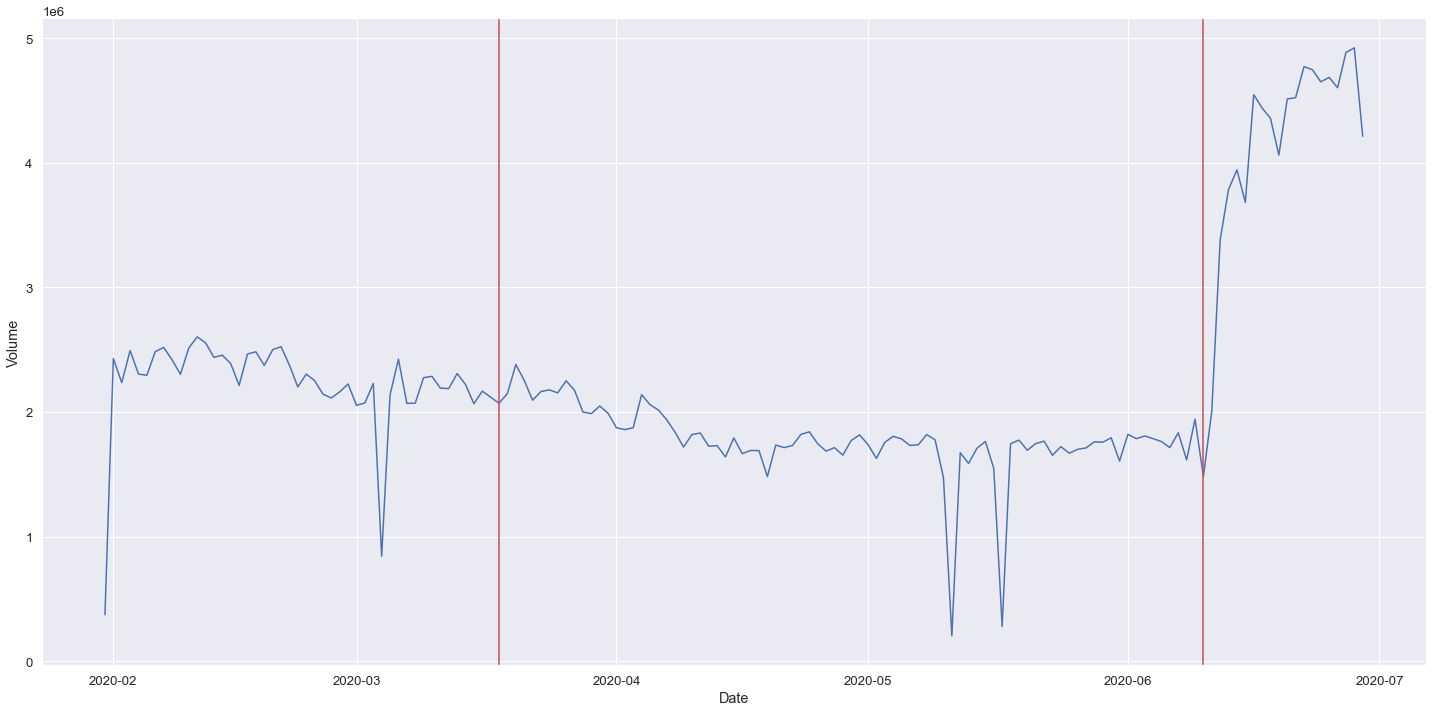

In [14]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

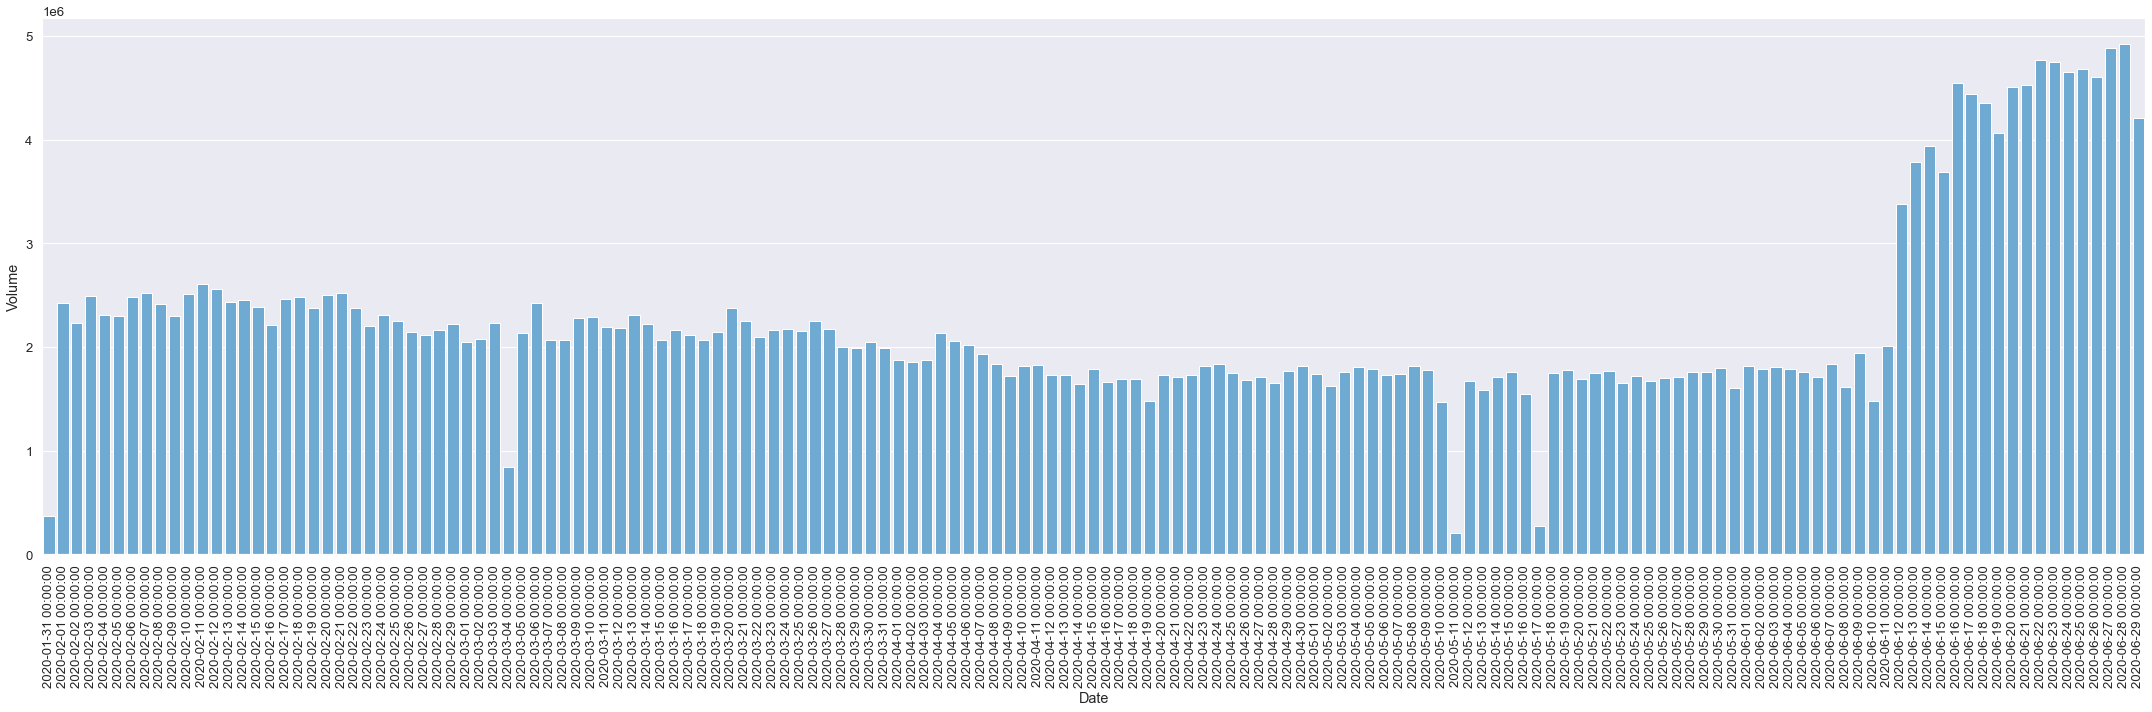

In [110]:
fig = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Date',y='Volume',data=df_total_flux,palette=['#5DADE2'])

ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [15]:
# df.to_csv('../../data/Flux_24h.csv', sep = ',')

### Origins count and list

In [16]:
len(df.groupby(by = 'Origin').groups.keys())

27

In [17]:
list((df.groupby(by = 'Origin').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Hors_Zone',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [18]:
df['Origin'].value_counts()

Hors_Zone         3923
Kinshasa          1548
Tshopo             974
Kasai-Central      881
Nord-Kivu          877
Haut-Lomami        854
Haut-Katanga       850
Lomami             737
Kasai-Oriental     691
Kwilu              668
Kasai              578
Mongala            552
Lualaba            546
Tanganyika         532
Ituri              520
Sud-Kivu           515
Maniema            487
Equateur           470
Sud-Ubangi         330
Kwango             326
Mai-Ndombe         317
Bas-Uele           312
Haut-Uele          311
Nord-Ubangi        285
Sankuru            232
Kongo-Central      206
Tshuapa            133
Name: Origin, dtype: int64

### Destination count and list

In [19]:
len(df.groupby(by = 'Destination').groups.keys())

26

In [20]:
list((df.groupby(by = 'Destination').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [21]:
df['Destination'].value_counts()

Kinshasa          1725
Tshopo            1082
Nord-Kivu         1046
Kasai-Central      962
Haut-Lomami        950
Haut-Katanga       941
Kasai-Oriental     893
Lomami             893
Kwilu              834
Tanganyika         719
Kasai              717
Ituri              700
Lualaba            689
Sud-Kivu           676
Mongala            652
Maniema            640
Equateur           569
Sud-Ubangi         529
Haut-Uele          492
Kwango             485
Mai-Ndombe         478
Bas-Uele           471
Nord-Ubangi        442
Sankuru            419
Kongo-Central      348
Tshuapa            303
Name: Destination, dtype: int64

### Symmetry check 

In [22]:
df[((df['Origin'] == 'Bas-Uele') & (df['Destination'] == 'Kinshasa'))|((df['Origin'] == 'Kinshasa') & (df['Destination'] == 'Bas-Uele'))]

Date    Origin Destination  Volume  Date_day
6482  2020-03-17  Kinshasa    Bas-Uele      64         1
10910 2020-04-23  Bas-Uele    Kinshasa      21         3

### Shapefile Reading

In [23]:
zone_gd =gpd.read_file('./data/GEO DRC/RDC_Macro_Provinces.shp')
zone_gd

Index        C0        C1    Surface        PROVINCE  Population  \
0      22  0.415854  0.011909   52049.63      Sud-Ubangi   2 744 345   
1       7  0.458879  0.012838   54171.85     Nord-Ubangi   1 037 000   
2       2  0.451896  0.042421   56144.21         Mongala   1 793 564   
3      24  0.351923  0.003476  102527.71        Equateur   1 626 606   
4       8  0.247170  0.006137  132254.42         Tshuapa   1 316 855   
5      18  0.448842  0.040899  128920.31      Maï-Ndombe   1 768 327   
6      11  0.860444  0.013058   54797.26   Kongo-Central   5 575 000   
7       6  0.825040  0.071389   10690.79        Kinshasa  12 641 463   
8      20  0.478043  0.036460   90159.33          Kwango   1 994 036   
9      17  0.589400  0.045920   79270.37           Kwilu   3 637 000   
10     13  0.643254  0.039597   96648.35           Kasaï   3 199 891   
11     23  0.752269  0.082495   57045.44   Kasaï-Central   2 976 806   
12     16  0.844232  0.122613   10216.83  Kasaï-Oriental   5 475 398   
13     15  0.769327  0.081114   54314.18          Lomami   2 048 839   
14     25  0.688503  0.034374  109587.20     Haut-Lomami   2 540 127   
15      5  0.658575  0.037058  121992.73         Lualaba   1 677 288   
16      4  0.711857  0.022679  126576.44    Haut-Katanga   3 960 945   
17      1  0.524977  0.013152  134692.21      Tanganyika   2 482 009   
18     26  0.746701  0.034413   60031.77       Nord-Kivu   8 985 711   
19      9  0.529363  0.012831   65199.55        Sud-Kivu   5 772 000   
20     19  0.438406  0.025023  128678.93         Maniema   2 333 000   
21      3  0.385224  0.011245  108400.19         Sankuru   1 007 000   
22     10  0.395584  0.025731  201525.01          Tshopo   2 614 630   
23     14  0.388050  0.024537  149347.27        Bas-Uele   1 093 845   
24     21  0.495825  0.038647   92916.10       Haut-Uele   1 920 867   
25     12  0.686450  0.041201   66389.05           Ituri   4 241 236   

                                             geometry  
0   POLYGON ((18.68941 1.90628, 18.68649 1.90233, ...  
1   POLYGON ((20.39471 2.82687, 20.38231 2.81683, ...  
2   POLYGON ((21.63564 0.72938, 21.63387 0.72562, ...  
3   POLYGON ((16.94268 -1.86609, 16.94502 -2.00127...  
4   POLYGON ((21.84714 -2.53010, 21.84408 -2.53239...  
5   POLYGON ((20.27067 -4.39762, 20.26608 -4.39898...  
6   POLYGON ((12.45101 -6.05762, 12.44231 -6.05843...  
7   POLYGON ((15.83177 -5.02521, 15.83079 -5.02540...  
8   POLYGON ((17.61132 -8.12849, 17.58297 -8.12907...  
9   POLYGON ((19.36211 -6.39133, 19.35877 -6.39137...  
10  POLYGON ((20.57820 -7.29812, 20.54287 -7.29890...  
11  MULTIPOLYGON (((22.68625 -7.88297, 22.66109 -7...  
12  MULTIPOLYGON (((23.61644 -6.77145, 23.60941 -6...  
13  POLYGON ((23.68508 -7.99435, 23.68487 -7.99446...  
14  MULTIPOLYGON (((24.93444 -10.12938, 24.93029 -...  
15  POLYGON ((25.53683 -11.73446, 25.53175 -11.739...  
16  POLYGON ((29.72198 -13.45500, 29.71200 -13.456...  
17  MULTIPOLYGON (((28.06762 -8.41209, 28.06240 -8...  
18  POLYGON ((28.10913 -2.06207, 28.09976 -2.06577...  
19  MULTIPOLYGON (((28.90091 -5.00969, 28.80352 -5...  
20  MULTIPOLYGON (((28.41204 -5.01963, 28.40892 -5...  
21  MULTIPOLYGON (((23.90875 -5.85458, 23.90625 -5...  
22  POLYGON ((25.27648 -2.09896, 25.24008 -2.11198...  
23  POLYGON ((27.04530 1.95042, 27.04404 1.94119, ...  
24  POLYGON ((27.77349 1.44670, 27.77349 1.44325, ...  
25  POLYGON ((28.56843 0.52260, 28.55496 0.51962, ...

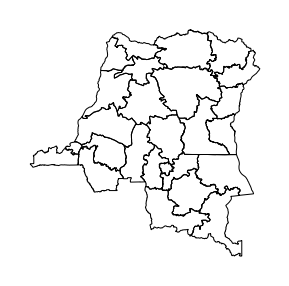

In [24]:
gpl.polyplot(zone_gd, figsize=(5,5))
plt.show()

# Mobility Visualization

## $\Delta$ Mobillity (IN) By Provinces

In [113]:
df_temp = df.groupby(by=['Date','Destination'],as_index=0).sum()

In [118]:
df_temp[df_temp.Destination == 'Kinshasa']

Date Destination  Volume  Date_day
9    2020-01-31    Kinshasa   36417        36
34   2020-02-01    Kinshasa  181134        80
60   2020-02-02    Kinshasa  153067        84
86   2020-02-03    Kinshasa  163423         0
112  2020-02-04    Kinshasa  169472        14
...         ...         ...     ...       ...
3802 2020-06-25    Kinshasa  579142        27
3828 2020-06-26    Kinshasa  547998        44
3854 2020-06-27    Kinshasa  640214        55
3880 2020-06-28    Kinshasa  661796        54
3906 2020-06-29    Kinshasa  571160         0

[151 rows x 4 columns]

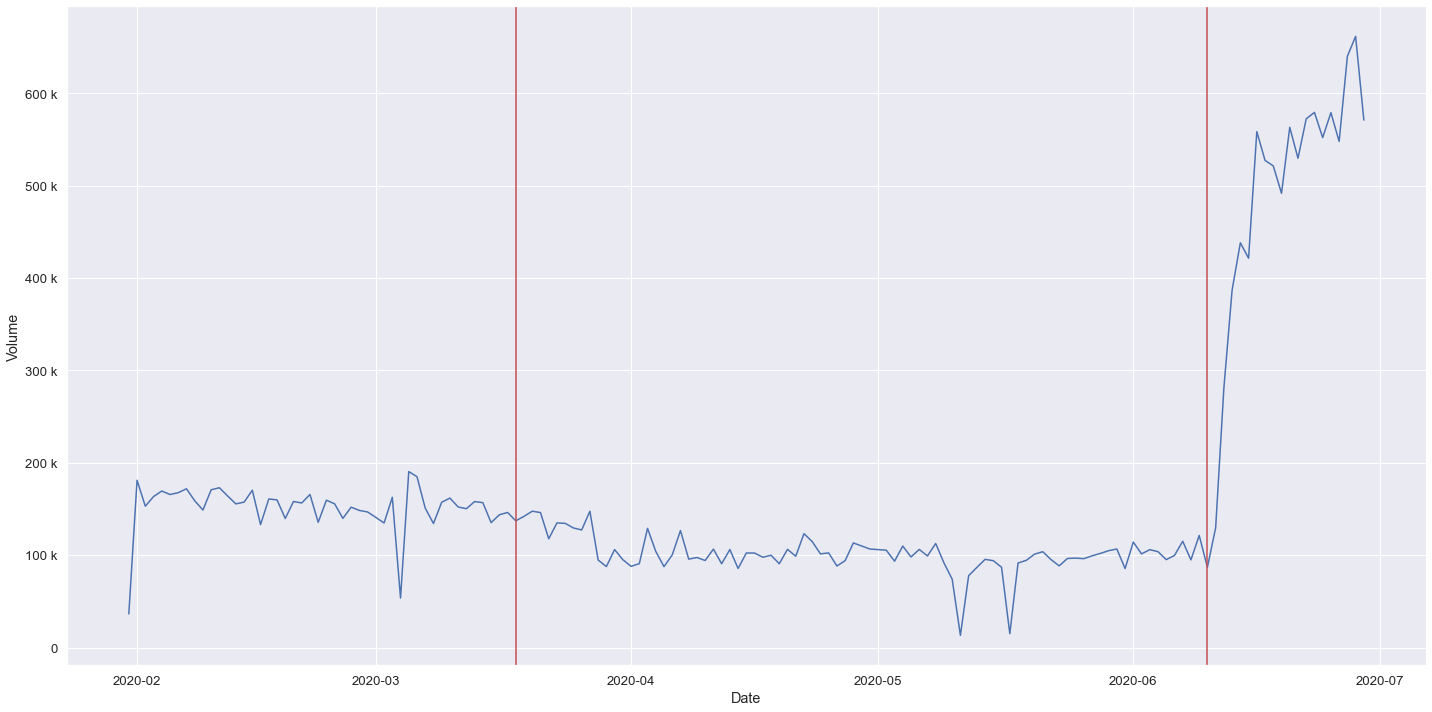

In [114]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_temp[df_temp.Destination == 'Kinshasa' ])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [121]:
df

Date        Origin     Destination  Volume  Date_day
0     2020-01-31      Bas-Uele          Tshopo     248         4
1     2020-01-31      Equateur        Kinshasa     867         4
2     2020-01-31      Equateur     Nord-Ubangi     288         4
3     2020-01-31      Equateur      Sud-Ubangi     289         4
4     2020-01-31  Haut-Katanga  Kasai-Oriental     102         4
...          ...           ...             ...     ...       ...
18650 2020-06-29        Tshopo           Ituri     505         0
18651 2020-06-29        Tshopo         Maniema     404         0
18652 2020-06-29        Tshopo         Mongala    1215         0
18653 2020-06-29        Tshopo        Sud-Kivu     101         0
18654 2020-06-29       Tshuapa          Tshopo     691         0

[18655 rows x 5 columns]

In [137]:
def filter_df_from_to(start_date, end_date, df):
    mask_base = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return df.loc[mask_base]

In [138]:
df_p1 = filter_df_from_to('2020-02-01','2020-03-18',df)
df_p2 = filter_df_from_to('2020-03-19','2020-06-10',df)
df_p3 = filter_df_from_to('2020-06-11','2020-06-29',df)

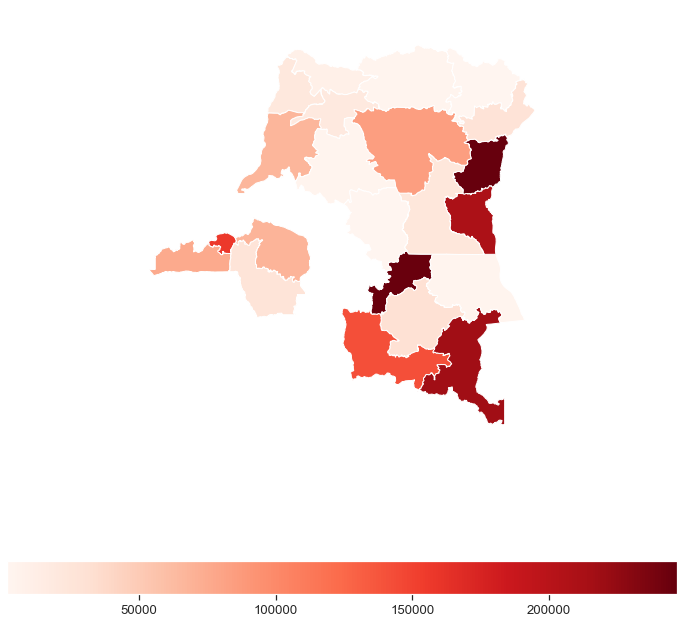

In [139]:
df_p1.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

df_p1_agg = df_p1.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

merged_df_agg = zone_gd.merge(df_p1_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

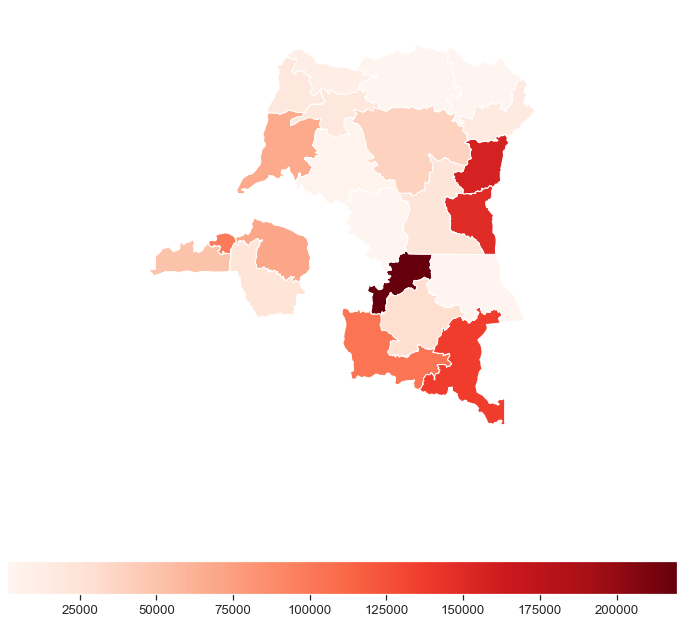

In [140]:
df_p2.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

df_p2_agg = df_p2.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

merged_df_agg = zone_gd.merge(df_p2_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

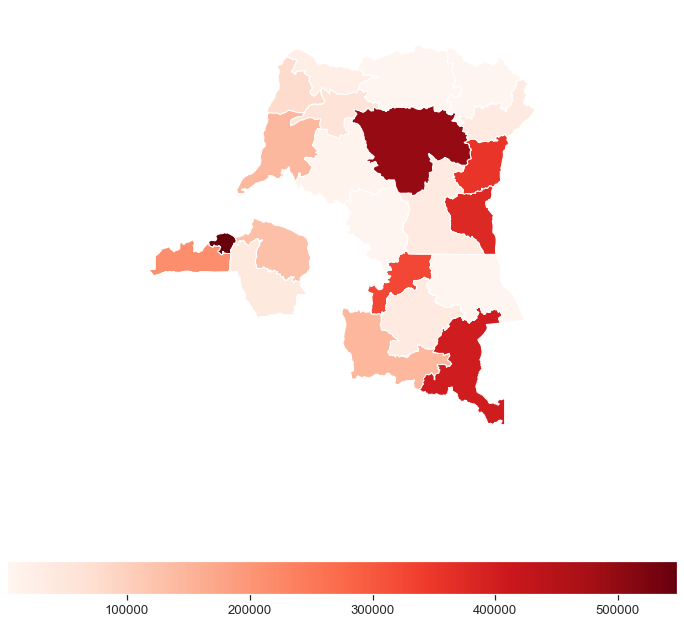

In [141]:
df_p3.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

df_p3_agg = df_p3.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)

merged_df_agg = zone_gd.merge(df_p3_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

In [147]:
#Comparison between p1 and p2

df_merged_agg = pd.merge(df_p1_agg,df_p2_agg,left_on='Destination',right_on='Destination')

df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='Destination')
df_merged_agg

Destination  Date_day_x  Volume_x  Date_day_y  Volume_y  diffVolume  \
21        Bas-Uele           3      4156         3.0    2119.5     -2036.5   
11        Equateur           3     66987         3.0   68309.0      1322.0   
3     Haut-Katanga           3    217817         3.0  137661.5    -80155.5   
13     Haut-Lomami           3     31360         3.0   29989.0     -1371.0   
24       Haut-Uele           3      2026         3.0    1458.0      -568.0   
14           Ituri           3     28300         3.0   16055.5    -12244.5   
12           Kasai           3     58863         3.0   50471.5     -8391.5   
5    Kasai-Central           3    167663         3.0  140977.5    -26685.5   
0   Kasai-Oriental           3    342376         3.0  284064.0    -58312.0   
6         Kinshasa           3    156887         3.0  100120.5    -56766.5   
9    Kongo-Central           3     75928         3.0   50058.5    -25869.5   
15          Kwango           3     27276         3.0   23464.5     -3811.5   
10           Kwilu           3     68646         3.0   69774.0      1128.0   
2           Lomami           3    245852         3.0  219650.0    -26202.0   
7          Lualaba           3    142407         3.0  102880.5    -39526.5   
16      Mai-Ndombe           3     23633         3.0   33272.0      9639.0   
17         Maniema           3     23183         3.0   22559.0      -624.0   
19         Mongala           3     19016         3.0   18489.5      -526.5   
1        Nord-Kivu           3    246857         3.0  157432.5    -89424.5   
20     Nord-Ubangi           3      9433         3.0   11044.0      1611.0   
25         Sankuru           3      1744         3.0    1354.5      -389.5   
4         Sud-Kivu           3    210148         3.0  149564.5    -60583.5   
18      Sud-Ubangi           3     21309         3.0   19919.0     -1390.0   
23      Tanganyika           3      3678         3.0    2287.0     -1391.0   
8           Tshopo           3     84649         3.0   38935.0    -45714.0   
22         Tshuapa           3      4085         3.0    4459.0       374.0   

    deltaVolume  
21   -49.001444  
11     1.973517  
3    -36.799469  
13    -4.371811  
24   -28.035538  
14   -43.266784  
12   -14.255984  
5    -15.916153  
0    -17.031568  
6    -36.183049  
9    -34.071094  
15   -13.973823  
10     1.643213  
2    -10.657631  
7    -27.756009  
16    40.786189  
17    -2.691627  
19    -2.768721  
1    -36.225224  
20    17.078342  
25   -22.333716  
4    -28.828968  
18    -6.523065  
23   -37.819467  
8    -54.004182  
22     9.155447

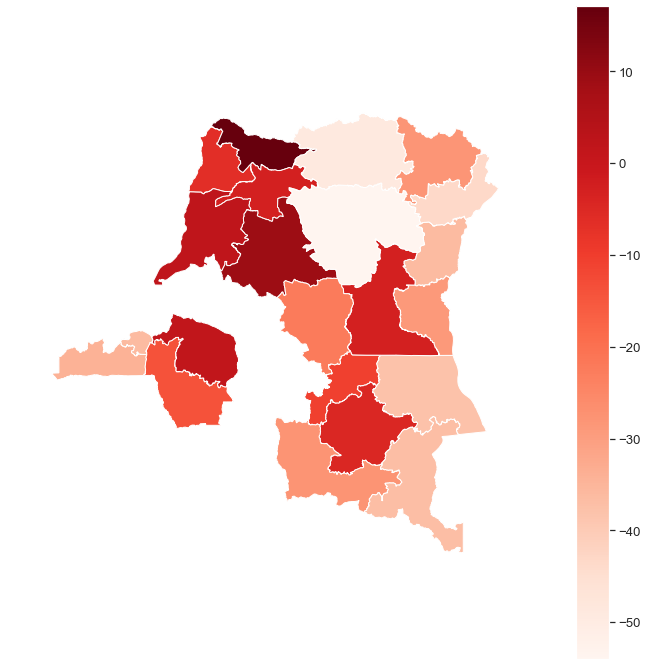

In [148]:
merged_df_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'vertical'}
)
plt.show()

In [149]:
#Comparison between p1 and p3

df_merged_agg = pd.merge(df_p1_agg,df_p3_agg,left_on='Destination',right_on='Destination')

df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='Destination')
df_merged_agg

Destination  Date_day_x  Volume_x  Date_day_y  Volume_y  diffVolume  \
21        Bas-Uele           3      4156           3      2761       -1395   
11        Equateur           3     66987           3    144131       77144   
3     Haut-Katanga           3    217817           3    403447      185630   
13     Haut-Lomami           3     31360           3     36882        5522   
24       Haut-Uele           3      2026           3      2265         239   
14           Ituri           3     28300           3     39317       11017   
12           Kasai           3     58863           3     55393       -3470   
5    Kasai-Central           3    167663           3    327162      159499   
0   Kasai-Oriental           3    342376           3    542020      199644   
6         Kinshasa           3    156887           3    547998      391111   
9    Kongo-Central           3     75928           3    214950      139022   
15          Kwango           3     27276           3     42284       15008   
10           Kwilu           3     68646           3    130805       62159   
2           Lomami           3    245852           3    324638       78786   
7          Lualaba           3    142407           3    146417        4010   
16      Mai-Ndombe           3     23633           3     64580       40947   
17         Maniema           3     23183           3     37978       14795   
19         Mongala           3     19016           3     58696       39680   
1        Nord-Kivu           3    246857           3    356549      109692   
20     Nord-Ubangi           3      9433           3     27384       17951   
25         Sankuru           3      1744           3      2678         934   
4         Sud-Kivu           3    210148           3    378328      168180   
18      Sud-Ubangi           3     21309           3     77860       56551   
23      Tanganyika           3      3678           3      4134         456   
8           Tshopo           3     84649           3    495793      411144   
22         Tshuapa           3      4085           3      9687        5602   

    deltaVolume  
21   -33.565929  
11   115.162643  
3     85.222916  
13    17.608418  
24    11.796644  
14    38.929329  
12    -5.895044  
5     95.130709  
0     58.311330  
6    249.294715  
9    183.097145  
15    55.022731  
10    90.550068  
2     32.046109  
7      2.815873  
16   173.261964  
17    63.818315  
19   208.666386  
1     44.435442  
20   190.300011  
25    53.555046  
4     80.029313  
18   265.385518  
23    12.398042  
8    485.704497  
22   137.135863

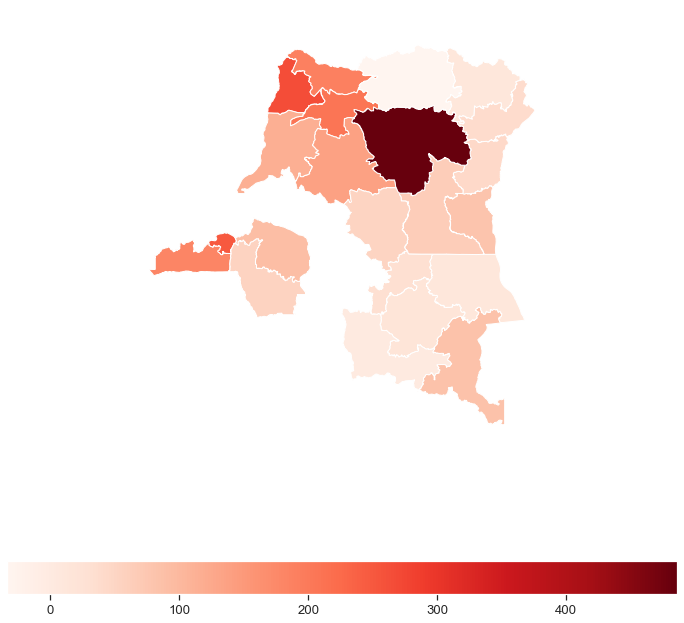

In [145]:
merged_df_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

In [85]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref = df.loc[mask_base]
df_obs = df.loc[mask_obs]


## Reference period

In [115]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
# df_ref_agg[df_ref_agg.Destination == 'Kinshasa']

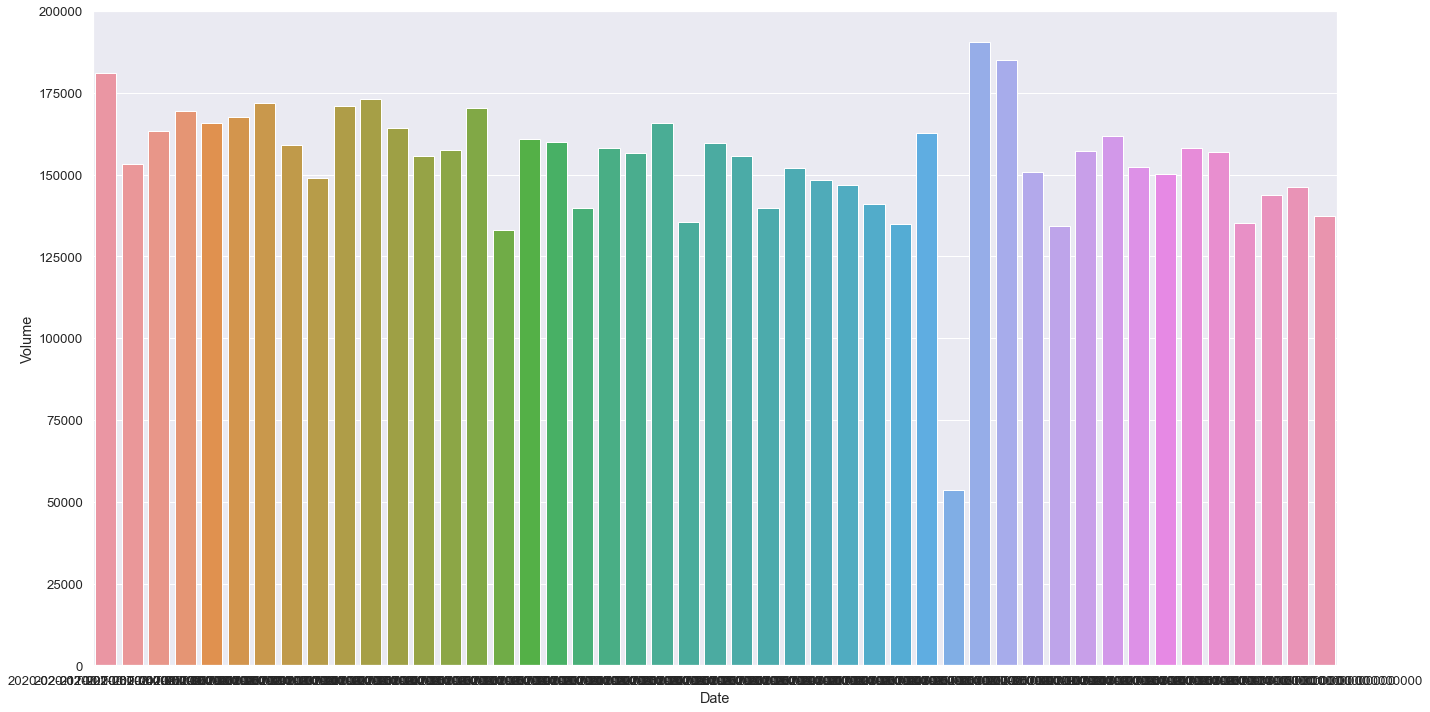

In [89]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x='Date',y='Volume',data=df_ref_agg[df_ref_agg.Destination == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [86]:
df_ref_agg = df_ref.groupby(by=['Date','Destination'],as_index=0).sum()
df_ref_agg = df_ref_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg.drop('Date_day',inplace=True,axis = 1)
df_ref_agg

Destination  Volume
8   Kasai-Oriental  342376
18       Nord-Kivu  246857
13          Lomami  245852
2     Haut-Katanga  217817
21        Sud-Kivu  210148
7    Kasai-Central  167663
9         Kinshasa  156887
14         Lualaba  142407
24          Tshopo   84649
10   Kongo-Central   75928
12           Kwilu   68646
1         Equateur   66987
6            Kasai   58863
3      Haut-Lomami   31360
5            Ituri   28300
11          Kwango   27276
15      Mai-Ndombe   23633
16         Maniema   23183
22      Sud-Ubangi   21309
17         Mongala   19016
19     Nord-Ubangi    9433
0         Bas-Uele    4156
25         Tshuapa    4085
23      Tanganyika    3678
4        Haut-Uele    2026
20         Sankuru    1744

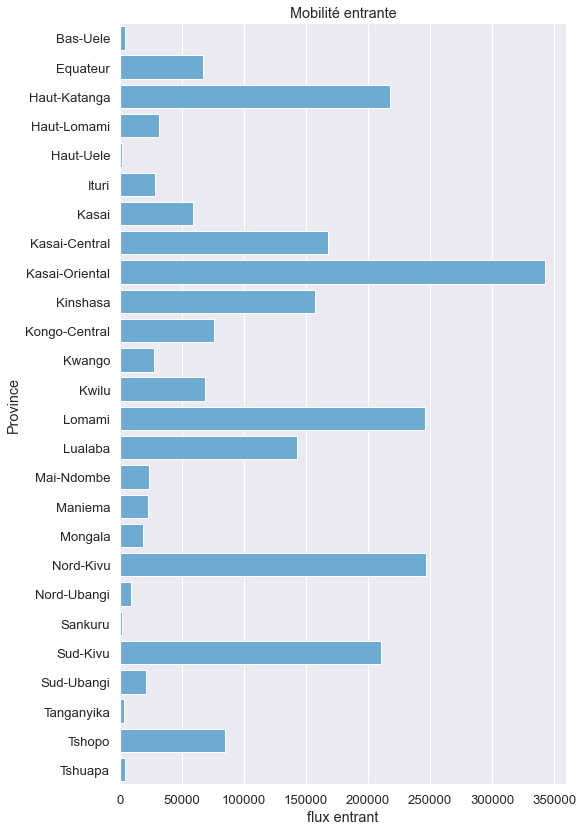

In [29]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_ref_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

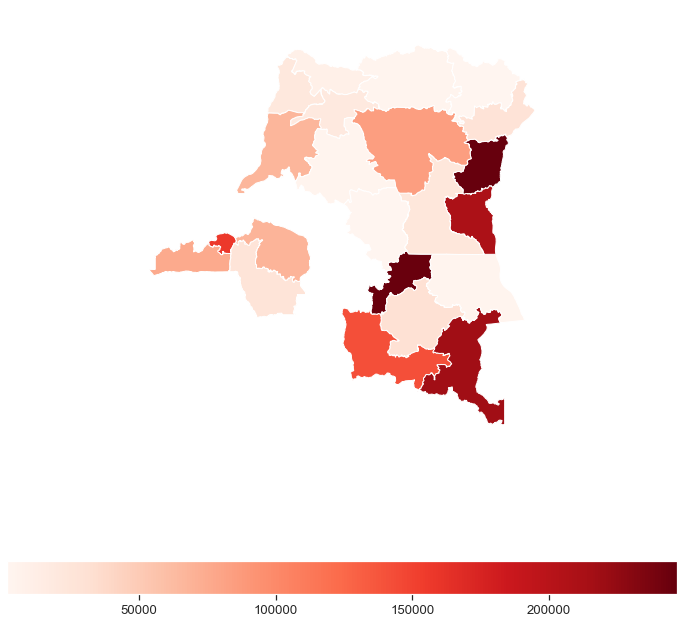

In [30]:
merged_df_agg = zone_gd.merge(df_ref_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Observation period

In [117]:
df_obs_agg = df_obs.groupby(by=['Date','Destination'],as_index=0).sum()
df_obs_agg[df_obs_agg.Destination == 'Kinshasa']

Date Destination  Volume  Date_day
9    2020-03-19    Kinshasa  142060        42
35   2020-03-20    Kinshasa  147623        60
61   2020-03-21    Kinshasa  146129        75
87   2020-03-22    Kinshasa  117748        84
113  2020-03-23    Kinshasa  134934         0
...         ...         ...     ...       ...
2555 2020-06-25    Kinshasa  579142        27
2581 2020-06-26    Kinshasa  547998        44
2607 2020-06-27    Kinshasa  640214        55
2633 2020-06-28    Kinshasa  661796        54
2659 2020-06-29    Kinshasa  571160         0

[103 rows x 4 columns]

In [31]:
df_obs_agg = df_obs.groupby(by=['Date','Destination'],as_index=0).sum()

df_obs_agg = df_obs_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg.drop('Date_day',inplace=True,axis = 1)
df_obs_agg

Destination    Volume
8   Kasai-Oriental  291414.0
13          Lomami  223121.0
18       Nord-Kivu  160608.0
21        Sud-Kivu  151133.0
7    Kasai-Central  146036.0
2     Haut-Katanga  140133.0
14         Lualaba  105634.0
9         Kinshasa  103785.0
12           Kwilu   72351.0
1         Equateur   70535.0
6            Kasai   51472.0
10   Kongo-Central   51465.0
24          Tshopo   39714.0
15      Mai-Ndombe   34483.0
3      Haut-Lomami   30976.0
11          Kwango   24530.0
16         Maniema   23807.0
22      Sud-Ubangi   20918.0
17         Mongala   19585.0
5            Ituri   16652.0
19     Nord-Ubangi   11386.5
25         Tshuapa    4949.5
23      Tanganyika    2402.0
0         Bas-Uele    2263.0
4        Haut-Uele    1600.0
20         Sankuru    1499.0

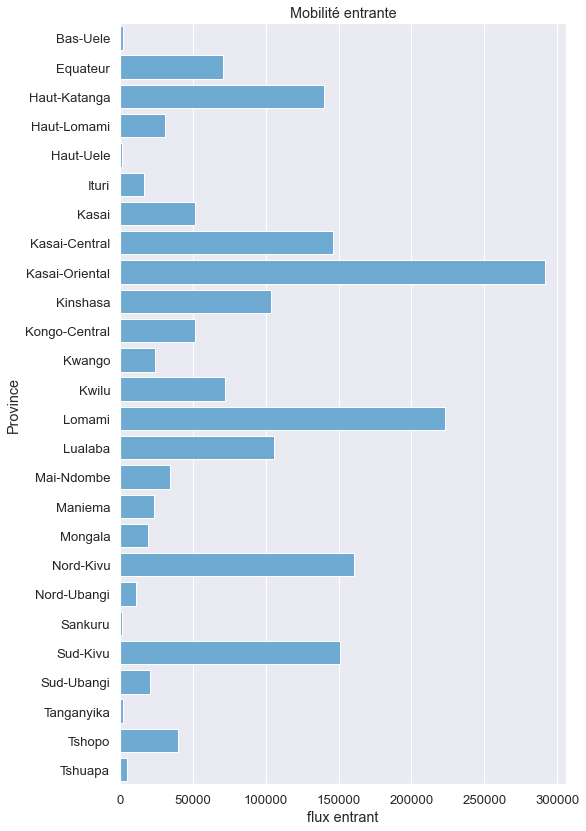

In [32]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_obs_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

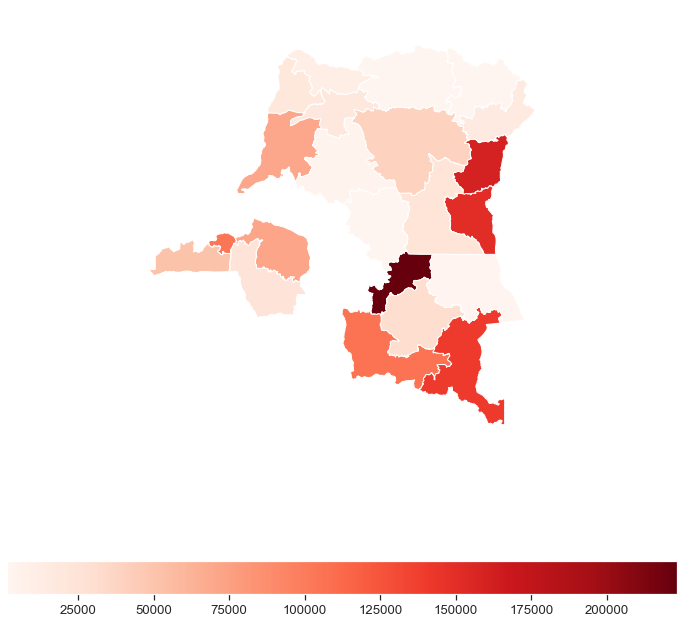

In [33]:
merged_df_agg = zone_gd.merge(df_obs_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [34]:
df_merged_agg = pd.merge(df_ref_agg,df_obs_agg,left_on='Destination',right_on='Destination')

df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='Destination')
df_merged_agg

Destination  Volume_x  Volume_y  diffVolume  deltaVolume
21        Bas-Uele      4156    2263.0     -1893.0   -45.548604
11        Equateur     66987   70535.0      3548.0     5.296550
3     Haut-Katanga    217817  140133.0    -77684.0   -35.664801
13     Haut-Lomami     31360   30976.0      -384.0    -1.224490
24       Haut-Uele      2026    1600.0      -426.0   -21.026654
14           Ituri     28300   16652.0    -11648.0   -41.159011
12           Kasai     58863   51472.0     -7391.0   -12.556275
5    Kasai-Central    167663  146036.0    -21627.0   -12.899089
0   Kasai-Oriental    342376  291414.0    -50962.0   -14.884805
6         Kinshasa    156887  103785.0    -53102.0   -33.847291
9    Kongo-Central     75928   51465.0    -24463.0   -32.218681
15          Kwango     27276   24530.0     -2746.0   -10.067459
10           Kwilu     68646   72351.0      3705.0     5.397255
2           Lomami    245852  223121.0    -22731.0    -9.245806
7          Lualaba    142407  105634.0    -36773.0   -25.822467
16      Mai-Ndombe     23633   34483.0     10850.0    45.910380
17         Maniema     23183   23807.0       624.0     2.691627
19         Mongala     19016   19585.0       569.0     2.992217
1        Nord-Kivu    246857  160608.0    -86249.0   -34.938851
20     Nord-Ubangi      9433   11386.5      1953.5    20.709212
25         Sankuru      1744    1499.0      -245.0   -14.048165
4         Sud-Kivu    210148  151133.0    -59015.0   -28.082589
18      Sud-Ubangi     21309   20918.0      -391.0    -1.834905
23      Tanganyika      3678    2402.0     -1276.0   -34.692768
8           Tshopo     84649   39714.0    -44935.0   -53.083911
22         Tshuapa      4085    4949.5       864.5    21.162791

In [35]:
# dict_mob = {}
# for dest in list((df.groupby(by = 'Destination').groups.keys())):
#     baseline_value = df_ref['Volume'].loc[df_ref['Destination'] == dest ].sum() 
#      #avoid division by zero
#     if(baseline_value == 0):
#         continue
#     current_value = df_obs['Volume'].loc[df_obs['Destination'] == dest ].sum() 
#     dict_mob[dest] = (current_value - baseline_value)*100/baseline_value
# dict_mob
# df_mobility = pd.DataFrame(dict(provinces = list(dict_mob.keys()),Volume = list(dict_mob.values())))
# df_mobility

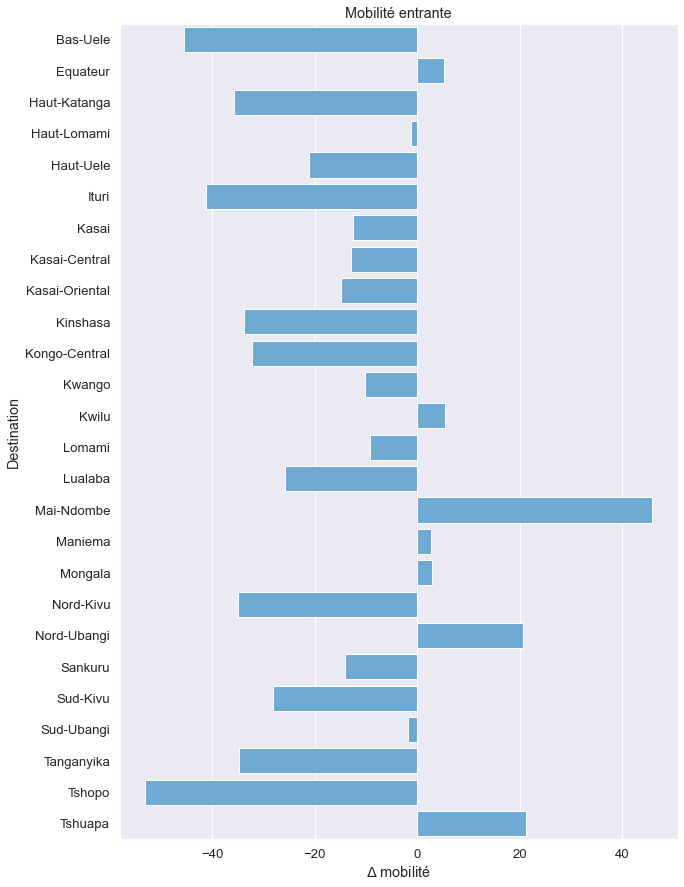

In [36]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Destination", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg, orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = '$\Delta$ mobilité')
plt.show()

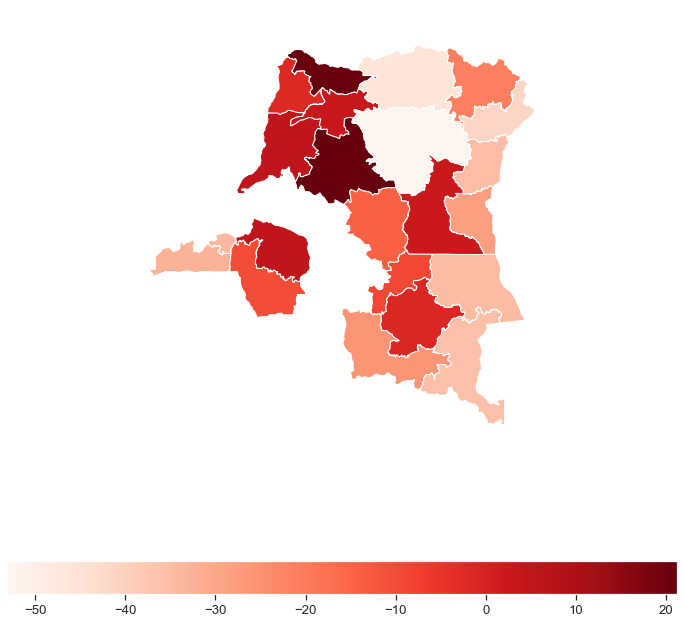

In [37]:
merged_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_agg, hue=merged_agg['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (IN) trends By Provinces

In [38]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Destination == 'Kinshasa']

Destination  Date_day    Volume
63    Kinshasa         0  159590.0
64    Kinshasa         1  161836.0
65    Kinshasa         2  139855.0
66    Kinshasa         3  156839.0
67    Kinshasa         4  157759.5
68    Kinshasa         5  158974.0
69    Kinshasa         6  135611.0

In [39]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Destination == 'Kinshasa']

Date Destination  Date_day  Volume
9    2020-03-19    Kinshasa         3  142060
35   2020-03-20    Kinshasa         4  147623
61   2020-03-21    Kinshasa         5  146129
87   2020-03-22    Kinshasa         6  117748
113  2020-03-23    Kinshasa         0  134934
...         ...         ...       ...     ...
2555 2020-06-25    Kinshasa         3  579142
2581 2020-06-26    Kinshasa         4  547998
2607 2020-06-27    Kinshasa         5  640214
2633 2020-06-28    Kinshasa         6  661796
2659 2020-06-29    Kinshasa         0  571160

[103 rows x 4 columns]

In [40]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Destination','Date_day'],right_on=['Destination','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date  Destination  Date_day  Volume_x  Volume_y      deltaV
0    2020-03-19     Bas-Uele         3      3508    4114.0  -14.730190
360  2020-03-19       Tshopo         3     83304   91631.0   -9.087536
345  2020-03-19   Tanganyika         3      4436    3803.5   16.629420
45   2020-03-19  Haut-Lomami         3     25877   33787.0  -23.411371
330  2020-03-19   Sud-Ubangi         3     16354   20798.0  -21.367439
...         ...          ...       ...       ...       ...         ...
1858 2020-06-29  Nord-Ubangi         0     20882    8075.0  158.600619
1873 2020-06-29      Sankuru         0      3639    1744.0  108.658257
1888 2020-06-29     Sud-Kivu         0    354469  222257.0   59.486090
1903 2020-06-29   Sud-Ubangi         0     85633   19080.0  348.810273
1633 2020-06-29    Haut-Uele         0      1798    2548.0  -29.434851

[2676 rows x 6 columns]

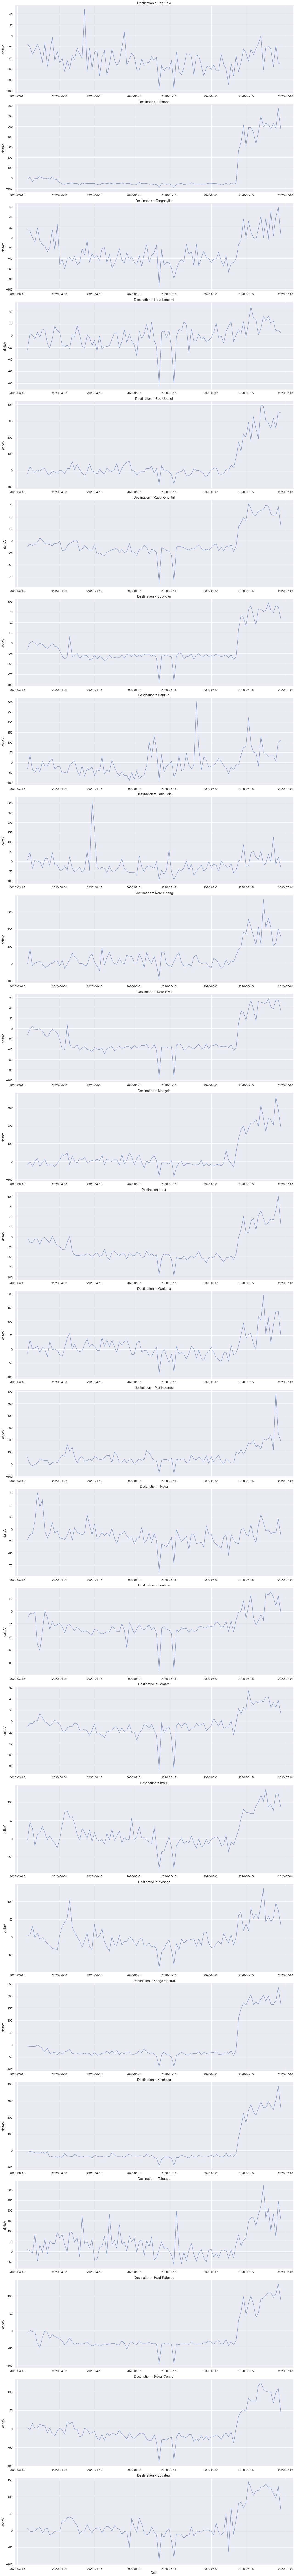

In [41]:
g = sns.FacetGrid(df_trend, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

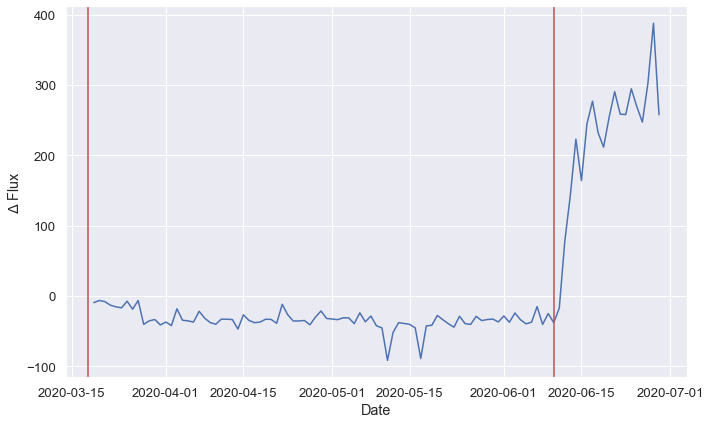

In [42]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Destination == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')

ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

## $\Delta$ Mobillity (OUT) By Provinces

In [43]:
df_temp = df.groupby(by=['Date','Origin'],as_index=0).sum()

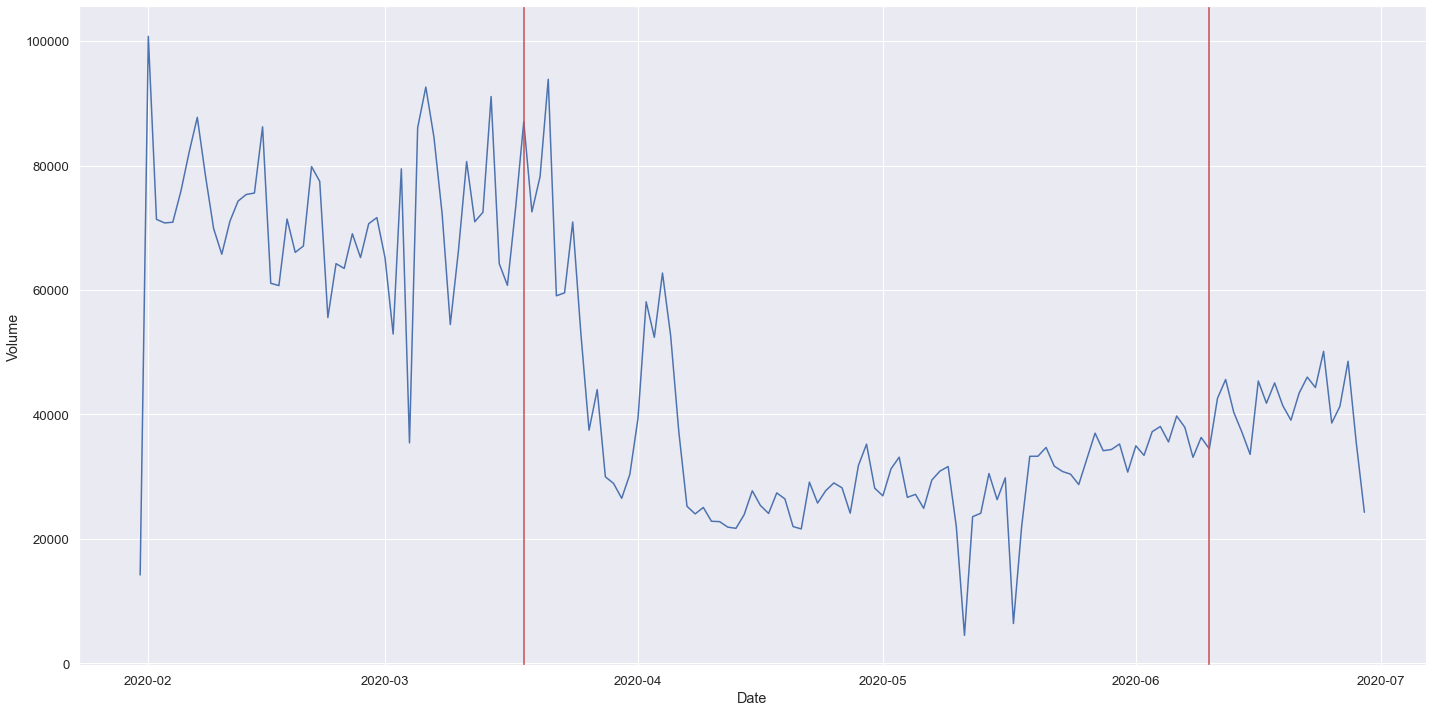

In [44]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_temp[df_temp.Origin == 'Kinshasa' ])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [45]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref_out = df.loc[mask_base]
df_obs_out = df.loc[mask_obs]


## Reference period

In [46]:
df_ref_agg_out = df_ref_out.groupby(by=['Date','Origin'],as_index=0).sum()
df_ref_agg_out = df_ref_agg_out.groupby(by='Origin',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg_out.drop('Date_day',inplace=True,axis = 1)
df_ref_agg_out

Origin    Volume
5        Hors_Zone  912311.0
9   Kasai-Oriental  293889.0
14          Lomami  218589.0
19       Nord-Kivu  170353.0
22        Sud-Kivu  159830.0
15         Lualaba  114476.0
2     Haut-Katanga  112493.0
8    Kasai-Central   99218.0
10        Kinshasa   71352.0
11   Kongo-Central   42585.0
3      Haut-Lomami   25979.0
7            Kasai   21529.0
13           Kwilu   16700.0
6            Ituri   11779.0
12          Kwango    6919.0
25          Tshopo    6500.0
1         Equateur    3384.0
23      Sud-Ubangi    3047.0
16      Mai-Ndombe    2747.0
20     Nord-Ubangi    2481.0
18         Mongala    1735.0
17         Maniema    1344.0
0         Bas-Uele    1084.0
24      Tanganyika     709.0
4        Haut-Uele     390.5
26         Tshuapa     293.0
21         Sankuru     135.0

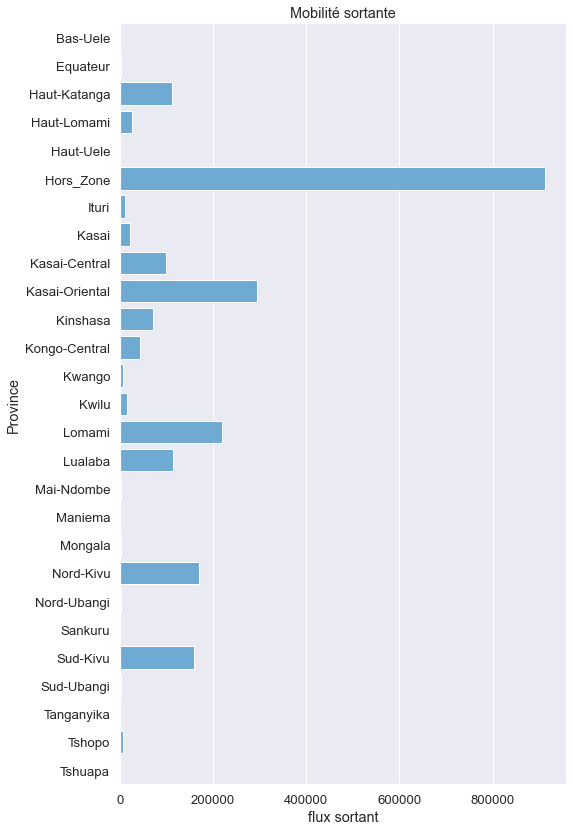

In [47]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_ref_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

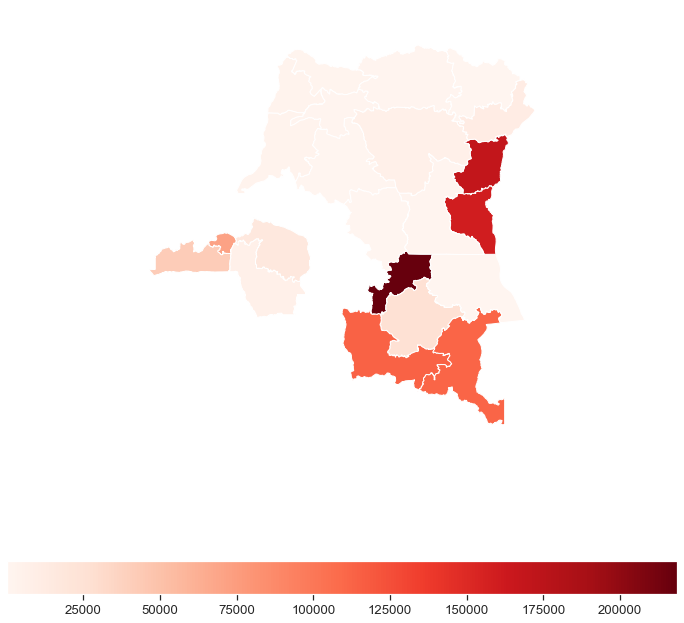

In [48]:
merged_df_agg_out = zone_gd.merge(df_ref_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Observation period

In [49]:
df_obs_agg_out = df_obs_out.groupby(by=['Date','Origin'],as_index=0).sum()
df_obs_agg_out = df_obs_agg_out.groupby(by='Origin',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg_out.drop('Date_day',inplace=True,axis = 1)
df_obs_agg_out

Origin    Volume
5        Hors_Zone  659554.0
9   Kasai-Oriental  265979.0
14          Lomami  204456.0
19       Nord-Kivu  125032.0
22        Sud-Kivu  118915.0
8    Kasai-Central   97244.0
15         Lualaba   90350.0
2     Haut-Katanga   86343.0
10        Kinshasa   33099.0
3      Haut-Lomami   26123.0
11   Kongo-Central   23206.0
7            Kasai   19851.0
13           Kwilu   17484.0
6            Ituri    8148.0
12          Kwango    6581.5
16      Mai-Ndombe    5886.0
25          Tshopo    3655.0
1         Equateur    3491.5
23      Sud-Ubangi    2443.5
20     Nord-Ubangi    2144.0
18         Mongala    2003.5
17         Maniema    1683.0
0         Bas-Uele     654.0
26         Tshuapa     407.0
4        Haut-Uele     303.0
24      Tanganyika     297.0
21         Sankuru     104.0

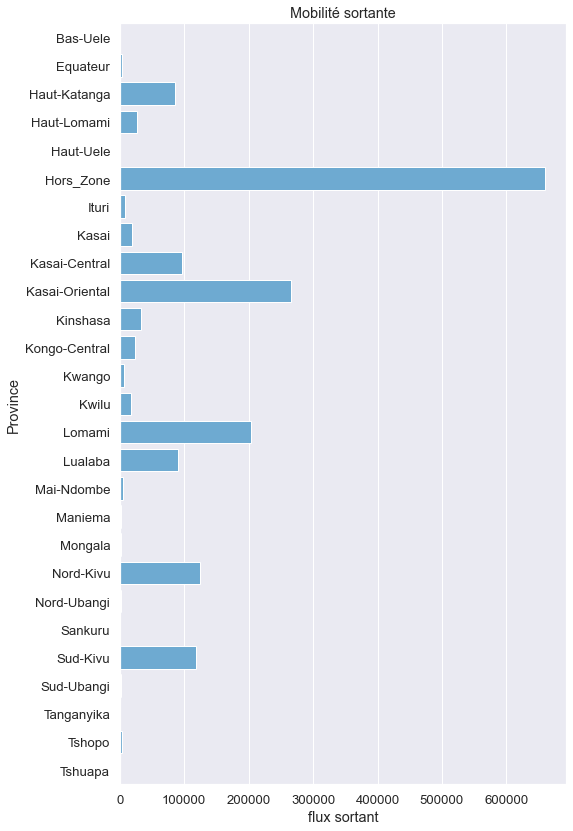

In [50]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_obs_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

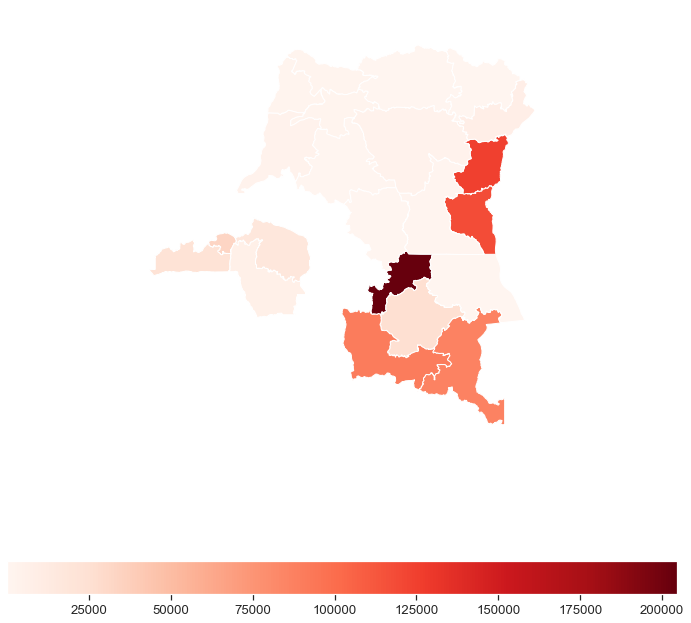

In [51]:
merged_df_agg_out = zone_gd.merge(df_obs_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [52]:
df_merged_agg_out = pd.merge(df_ref_agg_out,df_obs_agg_out,left_on='Origin',right_on='Origin')

df_merged_agg_out['diffVolume'] = (df_merged_agg_out.Volume_y - df_merged_agg_out.Volume_x )

df_merged_agg_out['deltaVolume'] = df_merged_agg_out['diffVolume']/df_merged_agg_out.Volume_x*100
df_merged_agg_out = df_merged_agg_out.sort_values(by='deltaVolume')
df_merged_agg_out

Origin  Volume_x  Volume_y  diffVolume  deltaVolume
23      Tanganyika     709.0     297.0      -412.0   -58.110014
8         Kinshasa   71352.0   33099.0    -38253.0   -53.611672
9    Kongo-Central   42585.0   23206.0    -19379.0   -45.506634
15          Tshopo    6500.0    3655.0     -2845.0   -43.769231
22        Bas-Uele    1084.0     654.0      -430.0   -39.667897
13           Ituri   11779.0    8148.0     -3631.0   -30.826046
0        Hors_Zone  912311.0  659554.0   -252757.0   -27.705136
3        Nord-Kivu  170353.0  125032.0    -45321.0   -26.604169
4         Sud-Kivu  159830.0  118915.0    -40915.0   -25.599074
6     Haut-Katanga  112493.0   86343.0    -26150.0   -23.245891
26         Sankuru     135.0     104.0       -31.0   -22.962963
24       Haut-Uele     390.5     303.0       -87.5   -22.407170
5          Lualaba  114476.0   90350.0    -24126.0   -21.075160
17      Sud-Ubangi    3047.0    2443.5      -603.5   -19.806367
19     Nord-Ubangi    2481.0    2144.0      -337.0   -13.583233
1   Kasai-Oriental  293889.0  265979.0    -27910.0    -9.496783
11           Kasai   21529.0   19851.0     -1678.0    -7.794138
2           Lomami  218589.0  204456.0    -14133.0    -6.465559
14          Kwango    6919.0    6581.5      -337.5    -4.877873
7    Kasai-Central   99218.0   97244.0     -1974.0    -1.989558
10     Haut-Lomami   25979.0   26123.0       144.0     0.554294
16        Equateur    3384.0    3491.5       107.5     3.176714
12           Kwilu   16700.0   17484.0       784.0     4.694611
20         Mongala    1735.0    2003.5       268.5    15.475504
21         Maniema    1344.0    1683.0       339.0    25.223214
25         Tshuapa     293.0     407.0       114.0    38.907850
18      Mai-Ndombe    2747.0    5886.0      3139.0   114.270113

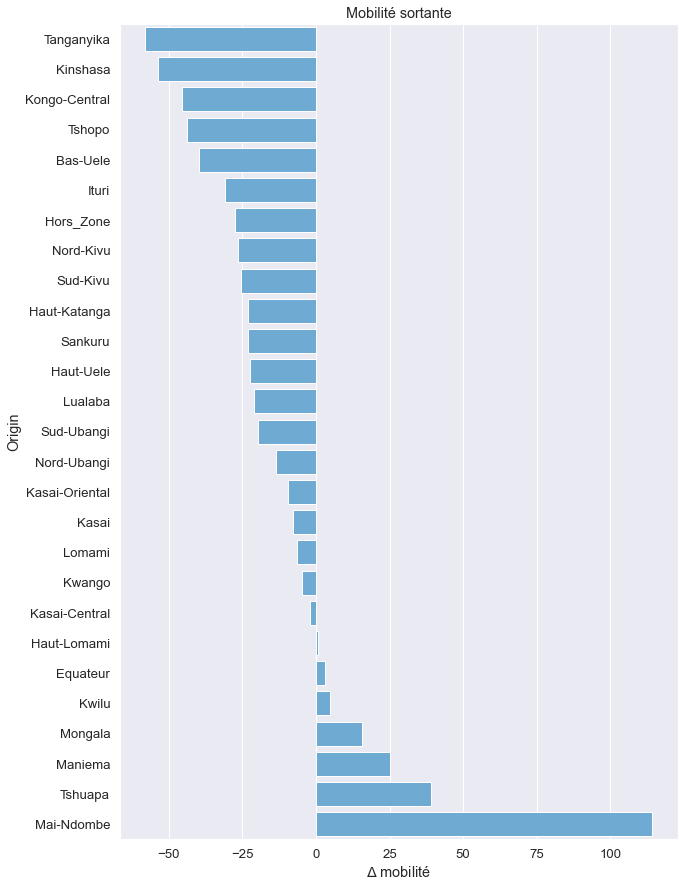

In [53]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Origin", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_out.sort_values(by='deltaVolume'), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = '$\Delta$ mobilité')
plt.show()

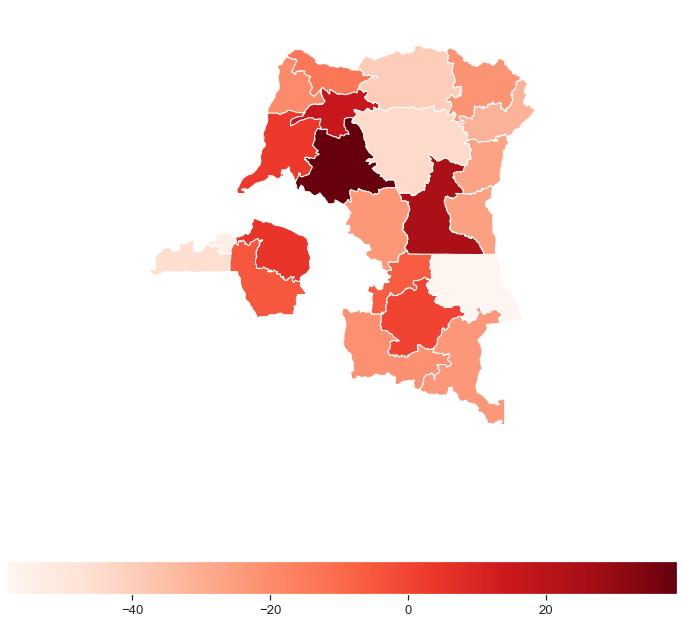

In [54]:
merged_agg_out = zone_gd.merge(df_merged_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (OUT) trends By Provinces

In [55]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Origin','Date_day'],as_index=0).sum().groupby(by=['Origin','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Origin == 'Kinshasa']

Origin  Date_day   Volume
70  Kinshasa         0  60751.0
71  Kinshasa         1  71052.0
72  Kinshasa         2  74293.0
73  Kinshasa         3  73158.0
74  Kinshasa         4  77708.0
75  Kinshasa         5  84530.0
76  Kinshasa         6  65198.0

In [56]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Origin','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Origin == 'Kinshasa']

Date    Origin  Date_day  Volume
10   2020-03-19  Kinshasa         3   72555
37   2020-03-20  Kinshasa         4   78232
64   2020-03-21  Kinshasa         5   93867
90   2020-03-22  Kinshasa         6   59067
116  2020-03-23  Kinshasa         0   59541
...         ...       ...       ...     ...
2580 2020-06-25  Kinshasa         3   38618
2606 2020-06-26  Kinshasa         4   41286
2632 2020-06-27  Kinshasa         5   48544
2658 2020-06-28  Kinshasa         6   35505
2685 2020-06-29  Kinshasa         0   24263

[103 rows x 4 columns]

In [57]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Origin','Date_day'],right_on=['Origin','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date          Origin  Date_day  Volume_x  Volume_y      deltaV
0    2020-03-19        Bas-Uele         3      1798    1132.5   58.763797
30   2020-03-19    Haut-Katanga         3    102474  110662.5   -7.399526
45   2020-03-19     Haut-Lomami         3     27424   26644.0    2.927488
104  2020-03-19           Kasai         3     15964   21712.0  -26.473839
385  2020-03-19         Tshuapa         3       460    1115.0  -58.744395
...         ...             ...       ...       ...       ...         ...
1925 2020-06-29      Tanganyika         0       249     939.0  -73.482428
1644 2020-06-29       Hors_Zone         0   3171410  954309.0  232.325274
1940 2020-06-29          Tshopo         0      2528    6500.0  -61.107692
1704 2020-06-29  Kasai-Oriental         0    224660  284790.0  -21.113803
2701 2020-06-29         Tshuapa         0       691     212.5  225.176471

[2702 rows x 6 columns]

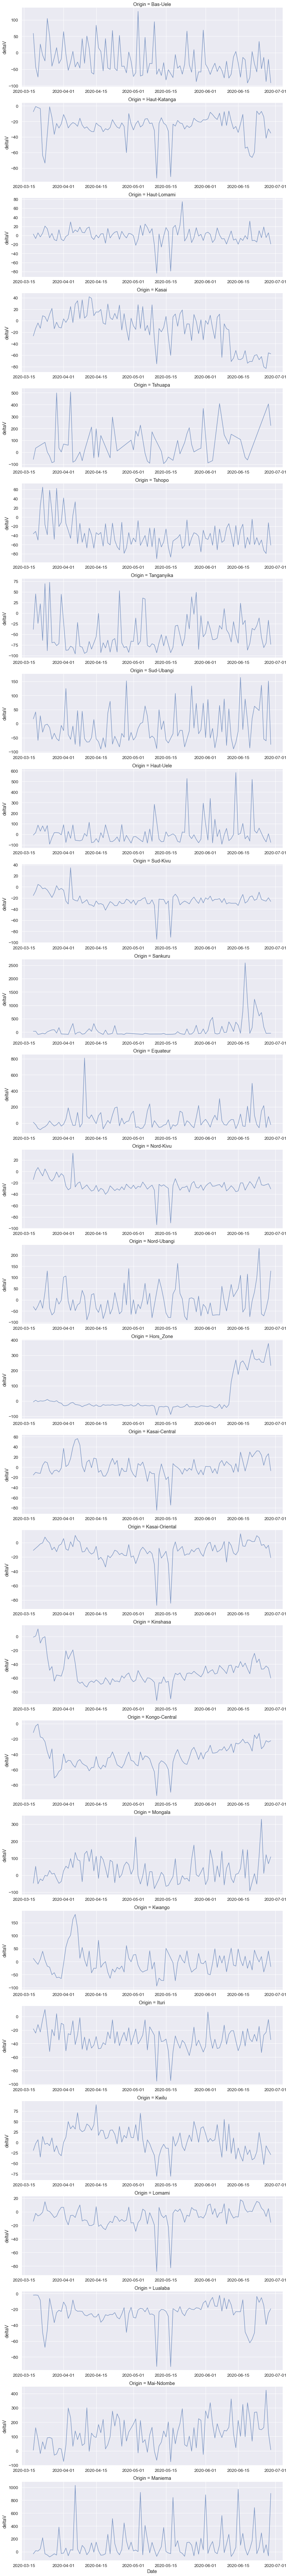

In [58]:
g = sns.FacetGrid(df_trend, row="Origin",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

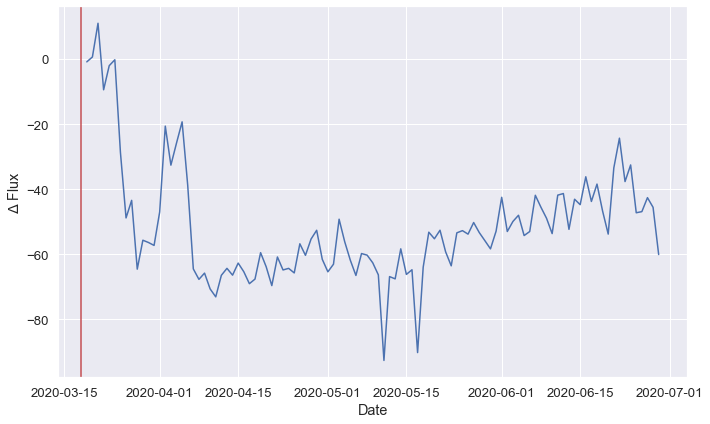

In [59]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Origin == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

# Presence Visualization

In [90]:
# reading csv file
dfp = pd.read_csv('data/Zoning Province/Presence_24h.csv',sep = ';')
dfp

Date Day_type PresenceType      Type Activity_Zone  Home_Zone  \
0       2020-01-31       JO         Jour     Local     Hors_Zone  Hors_Zone   
1       2020-01-31       JO         Nuit     Local     Hors_Zone  Hors_Zone   
2       2020-01-31       JO         Jour     Local    Tanganyika  Hors_Zone   
3       2020-01-31       JO         Nuit     Local    Tanganyika  Hors_Zone   
4       2020-01-31       JO         Jour     Local  Haut-Katanga  Hors_Zone   
...            ...      ...          ...       ...           ...        ...   
173129  2020-06-29       JO         Nuit  Etranger     Nord-Kivu  Hors_Zone   
173130  2020-06-29       JO         Jour  Etranger     Hors_Zone  Nord-Kivu   
173131  2020-06-29       JO         Nuit  Etranger     Hors_Zone  Nord-Kivu   
173132  2020-06-29       JO         Jour  Etranger     Nord-Kivu  Nord-Kivu   
173133  2020-06-29       JO         Nuit  Etranger     Nord-Kivu  Nord-Kivu   

              Zone  Volume  
0       Tanganyika  105322  
1       Tanganyika   34120  
2       Tanganyika   79901  
3       Tanganyika   20994  
4       Tanganyika     176  
...            ...     ...  
173129   Nord-Kivu     968  
173130   Nord-Kivu    1575  
173131   Nord-Kivu    2025  
173132   Nord-Kivu    4589  
173133   Nord-Kivu    3833  

[173134 rows x 8 columns]

In [91]:
dfp.count()

Date             173134
Day_type         173134
PresenceType     173134
Type             173134
Activity_Zone    173134
Home_Zone        173134
Zone             173134
Volume           173134
dtype: int64

In [92]:
# Conversion of date field
dfp['Date'] = pd.to_datetime(dfp['Date'])
# dfp['Date_day'] = dfp['Date'].dt.weekday

In [93]:
list((dfp.groupby(by = 'Day_type').groups.keys()))

['JO', 'WE']

In [94]:
list((dfp.groupby(by = 'PresenceType').groups.keys()))

['Jour', 'Nuit']

In [95]:
list((dfp.groupby(by = 'Type').groups.keys()))

['Etranger', 'Local']

In [96]:
activities_zone = list((dfp.groupby(by = 'Activity_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [97]:
home_zone = list((dfp.groupby(by = 'Home_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [98]:
zone = list((dfp.groupby(by = 'Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [100]:
df_dzp = dfp.groupby(["Date","Zone",'PresenceType'],as_index=0).sum()
df_dzp
# df_dzp.groupby(["Zone",'PresenceType'],as_index=0).median()

Date          Zone PresenceType    Volume
0    2020-01-31      Bas-Uele         Jour    144815
1    2020-01-31      Bas-Uele         Nuit     75451
2    2020-01-31      Equateur         Jour   7694642
3    2020-01-31      Equateur         Nuit   5417668
4    2020-01-31  Haut-Katanga         Jour  18729851
...         ...           ...          ...       ...
7587 2020-06-29    Tanganyika         Nuit     97058
7588 2020-06-29        Tshopo         Jour  16304734
7589 2020-06-29        Tshopo         Nuit   9341227
7590 2020-06-29       Tshuapa         Jour    919213
7591 2020-06-29       Tshuapa         Nuit    405296

[7592 rows x 4 columns]



Let's first consider presence at night

In [101]:
#Aggregate by date and zone
dfp_night = dfp[dfp.PresenceType == 'Jour']
dfp_agg_date_zone = dfp_night.groupby(by=['Date','Zone'],as_index=0).sum()
dfp_agg_date_zone

Date          Zone    Volume
0    2020-01-31      Bas-Uele    144815
1    2020-01-31      Equateur   7694642
2    2020-01-31  Haut-Katanga  18729851
3    2020-01-31   Haut-Lomami    692213
4    2020-01-31     Haut-Uele    128358
...         ...           ...       ...
3791 2020-06-29      Sud-Kivu  10298555
3792 2020-06-29    Sud-Ubangi   4648133
3793 2020-06-29    Tanganyika    295907
3794 2020-06-29        Tshopo  16304734
3795 2020-06-29       Tshuapa    919213

[3796 rows x 3 columns]

### Visualization of distributions

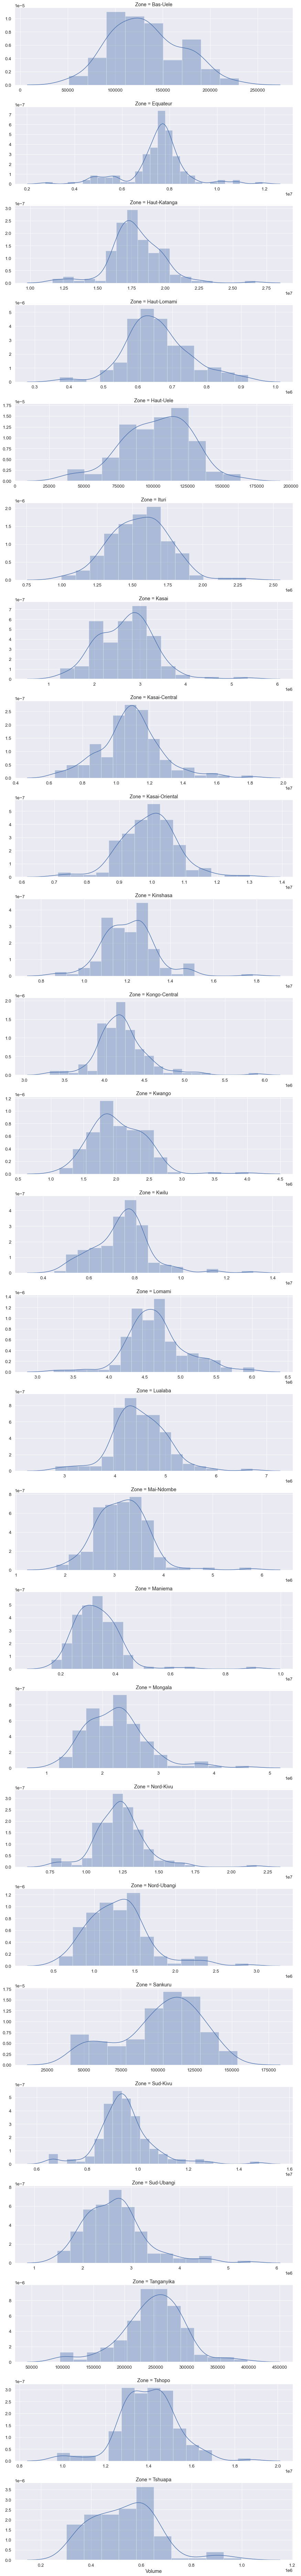

In [102]:
# fig = plt.figure(figsize=(8,5))
# ax = sns.distplot(a=dfp_agg_date_zone[(dfp_agg_date_zone.Zone == 'Kinshasa')]["Volume"])
# ax.set(title = 'Présence',xlabel = "presence",ylabel = '$P(x)$')
# plt.show()

g = sns.FacetGrid(dfp_agg_date_zone, row="Zone",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(sns.distplot, "Volume")
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

In [103]:
dfp_agg_date_zone.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume')

Zone      Volume
4        Haut-Uele    104706.5
20         Sankuru    107431.0
0         Bas-Uele    128737.0
23      Tanganyika    249933.0
25         Tshuapa    534246.5
3      Haut-Lomami    649897.5
19     Nord-Ubangi   1275497.5
5            Ituri   1552285.5
11          Kwango   1960785.0
17         Mongala   2206784.5
22      Sud-Ubangi   2647740.5
6            Kasai   2748466.0
15      Mai-Ndombe   3161984.0
16         Maniema   3240309.0
10   Kongo-Central   4195362.0
14         Lualaba   4446823.5
13          Lomami   4625438.0
12           Kwilu   7548283.5
1         Equateur   7643970.5
21        Sud-Kivu   9361157.0
8   Kasai-Oriental   9979257.5
7    Kasai-Central  10914122.0
9         Kinshasa  12063087.5
18       Nord-Kivu  12308689.0
24          Tshopo  14002660.5
2     Haut-Katanga  17652248.0

## Comparison of ref period and obs period

In [104]:
# Date Conversion
dfp_agg_date_zone['Date'] = pd.to_datetime(dfp_agg_date_zone['Date'])
dfp_agg_date_zone['Date_day'] = dfp_agg_date_zone['Date'].dt.weekday

In [105]:
ref_start_date = '2020-02-02'
ref_end_date = '2020-03-18'

mask_base = (dfp_agg_date_zone['Date'] >= ref_start_date) & (dfp_agg_date_zone['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (dfp_agg_date_zone['Date'] >= obs_start_date) & (dfp_agg_date_zone['Date'] <= obs_end_date)

df_ref_p = dfp_agg_date_zone.loc[mask_base]
df_obs_p = dfp_agg_date_zone.loc[mask_obs]

In [106]:
df_ref_p

Date          Zone    Volume  Date_day
52   2020-02-02      Bas-Uele    131502         6
53   2020-02-02      Equateur   7667441         6
54   2020-02-02  Haut-Katanga  16965484         6
55   2020-02-02   Haut-Lomami    647476         6
56   2020-02-02     Haut-Uele    107779         6
...         ...           ...       ...       ...
1165 2020-03-18      Sud-Kivu   9657194         2
1166 2020-03-18    Sud-Ubangi   2490430         2
1167 2020-03-18    Tanganyika    250161         2
1168 2020-03-18        Tshopo  14104136         2
1169 2020-03-18       Tshuapa    533434         2

[1118 rows x 4 columns]

In [107]:
#data aggregation
df_ref_agg_p = df_ref_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg_p.drop('Date_day',inplace=True,axis = 1)

df_obs_agg_p = df_obs_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_obs_agg_p.drop('Date_day',inplace=True,axis = 1)


df_merged_agg_p = pd.merge(df_ref_agg_p,df_obs_agg_p,left_on=['Zone'],right_on=['Zone'])
df_merged_agg_p['deltaVolume'] = (df_merged_agg_p.Volume_y - df_merged_agg_p.Volume_x )/df_merged_agg_p.Volume_x*100
df_merged_agg_p = df_merged_agg_p.sort_values(by='deltaVolume')
df_merged_agg_p

Zone  Volume_x  Date_day_x  Volume_y  Date_day_y  deltaVolume
23        Bas-Uele    175894           3    114489           3   -34.910230
12         Maniema   3897740           3   2941604           3   -24.530523
17          Kwango   2369912           3   1845712           3   -22.118965
21         Tshuapa    613746           3    479966           3   -21.797291
14           Kasai   3122166           3   2453093           3   -21.429770
24       Haut-Uele    119605           3     94401           3   -21.072698
19     Nord-Ubangi   1409286           3   1161383           3   -17.590681
13      Mai-Ndombe   3526014           3   2925731           3   -17.024408
15      Sud-Ubangi   2809313           3   2355259           3   -16.162457
16         Mongala   2371043           3   1995809           3   -15.825694
25         Sankuru    117760           3     99749           3   -15.294667
22      Tanganyika    275472           3    238315           3   -13.488485
9          Lualaba   4755973           3   4285147           3    -9.899678
3         Kinshasa  12636714           3  11521775           3    -8.823014
18           Ituri   1634635           3   1507054           3    -7.804862
0     Haut-Katanga  18584498           3  17233529           3    -7.269333
5   Kasai-Oriental  10382846           3   9658793           3    -6.973550
2        Nord-Kivu  12711889           3  11965184           3    -5.874068
1           Tshopo  14415068           3  13627077           3    -5.466440
4    Kasai-Central  11060979           3  10483868           3    -5.217540
20     Haut-Lomami    663933           3    630339           3    -5.059848
6         Sud-Kivu   9657194           3   9267938           3    -4.030736
11   Kongo-Central   4268152           3   4137875           3    -3.052305
7         Equateur   7748208           3   7547103           3    -2.595503
8            Kwilu   7624908           3   7455079           3    -2.227292
10          Lomami   4556906           3   4648198           3     2.003377

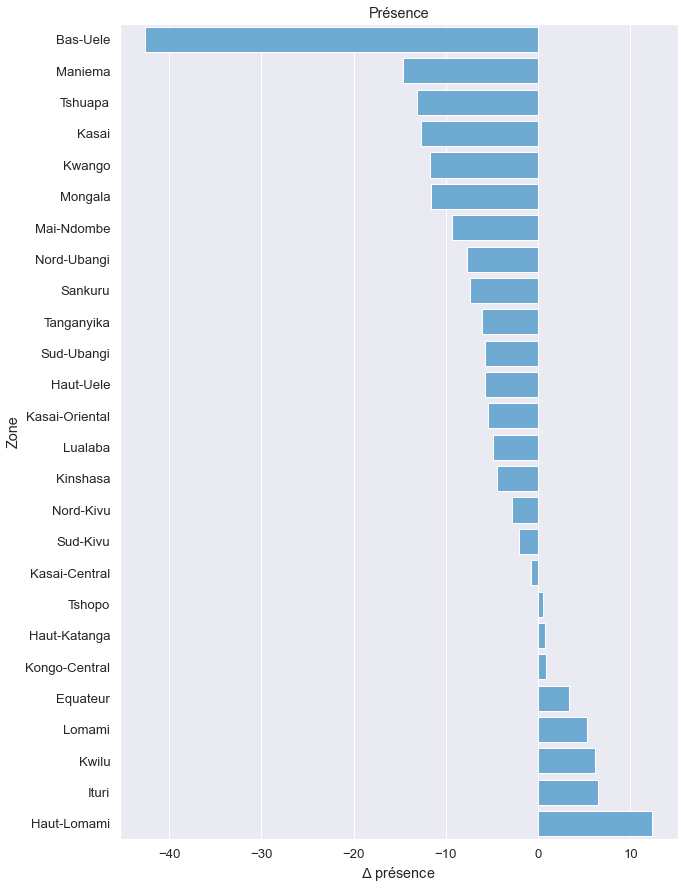

In [77]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Zone", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_p.sort_values(by='deltaVolume'), orient = 'h')
ax.set(title = 'Présence',xlabel = '$\Delta$ présence')
plt.show()

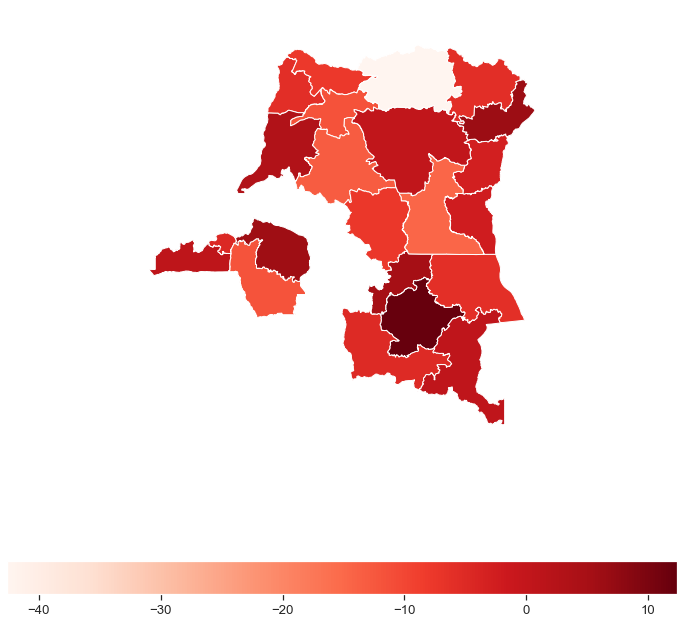

In [78]:
merged_agg_out = zone_gd.merge(df_merged_agg_p,left_on = 'PROVINCE', right_on = 'Zone' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Presence trends By Provinces

In [79]:
df_ref_agg_date_day = df_ref_p.groupby(by=['Date','Zone','Date_day'],as_index=0).sum().groupby(by=['Zone','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Zone == 'Kinshasa']

Zone  Date_day     Volume
63  Kinshasa         0  8893147.0
64  Kinshasa         1  9152189.0
65  Kinshasa         2  9413726.5
66  Kinshasa         3  9134572.0
67  Kinshasa         4  9436364.0
68  Kinshasa         5  9472602.0
69  Kinshasa         6  9243871.0

In [80]:
df_obs_agg_date_dest_dd = df_obs_p.groupby(by=['Date','Zone','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Zone == 'Kinshasa']

Date      Zone  Date_day    Volume
9    2020-03-19  Kinshasa         3   8581918
35   2020-03-20  Kinshasa         4   8401465
61   2020-03-21  Kinshasa         5   9275254
87   2020-03-22  Kinshasa         6  11418548
113  2020-03-23  Kinshasa         0   6189726
...         ...       ...       ...       ...
2505 2020-06-25  Kinshasa         3   8517057
2531 2020-06-26  Kinshasa         4   9446418
2557 2020-06-27  Kinshasa         5   7472078
2583 2020-06-28  Kinshasa         6   9045081
2609 2020-06-29  Kinshasa         0   8555117

[101 rows x 4 columns]

In [81]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Zone','Date_day'],right_on=['Zone','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date            Zone  Date_day  Volume_x    Volume_y     deltaV
0    2020-03-19        Bas-Uele         3     83311     97606.0 -14.645616
120  2020-03-19  Kasai-Oriental         3   7336975   7728277.0  -5.063250
60   2020-03-19       Haut-Uele         3     42224     43413.5  -2.739931
75   2020-03-19           Ituri         3    800997    866600.0  -7.570159
375  2020-03-19         Tshuapa         3    287757    290922.0  -1.087920
...         ...             ...       ...       ...         ...        ...
1567 2020-06-29     Haut-Lomami         0    448538    337815.5  32.776027
1552 2020-06-29    Haut-Katanga         0  10359555  10722007.5  -3.380454
1537 2020-06-29        Equateur         0   3756624   5191925.0 -27.644872
1732 2020-06-29         Lualaba         0   2676740   2745104.0  -2.490397
1642 2020-06-29  Kasai-Oriental         0   6766520   7784251.5 -13.074237

[2626 rows x 6 columns]

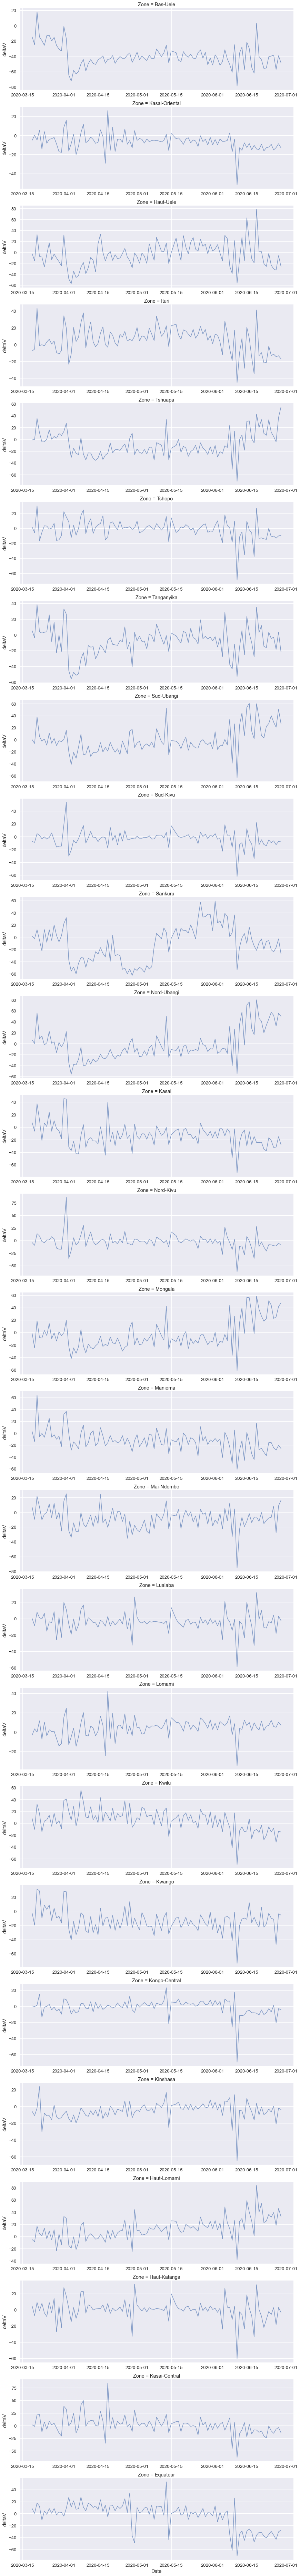

In [82]:
g = sns.FacetGrid(df_trend, row="Zone",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

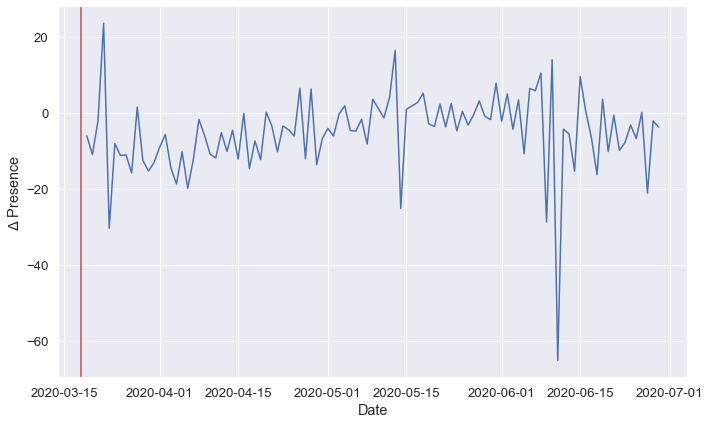

In [83]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Zone == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set(ylabel = '$\Delta$ Presence')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()